In [1]:
# （必須）モジュールのインポート
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
try:
    import japanize_matplotlib
except:
    pass

In [2]:
# （必須）カレントディレクトリの変更（自分の作業フォルダのパスをコピーして入力する）
os.chdir(r"C:\Users\parar\OneDrive\sport_data")

# イベントデータの解析

## データセット

### Pappalardoデータセット

Pappalardoデータセットはサッカーのイベントデータをまとめた大規模データセットであり，[CC BY 4.0ライセンス](https://creativecommons.org/licenses/by/4.0/deed.ja)の下で提供されている．
元のデータはWyscout社によって収集されたもので，それをL. Pappalardoらが編纂し2019年に公開された．
2022年時点で一般公開されている数少ない大規模サッカーデータである．
データセットの詳細は以下の論文にまとめられている：

- Pappalardo, L., Cintia, P., Rossi, A. et al. A public data set of spatio-temporal match events in soccer competitions. Sci Data 6, 236 (2019). https://doi.org/10.1038/s41597-019-0247-7

本章で用いるデータセットはPappalardoデータセットを加工・整形したものである．

### データセットの内容

**対象試合**

Pappalardoデータセットに含まれる試合は2017年度ヨーロッパリーグ，2018年度FIFAW杯，2016年度UEFAチャンピオンズリーグの全1941試合である．

| リーグ・大会名 | シーズン・年度 | 試合数 | イベント数 | 選手数 |
| ---- | ---- | ---- | ---- | ---- |
| スペイン１部リーグ（La Liga）| 2017-2018 | 380 | 628659 | 619 |
| イングランド１部リーグ（Premier League）| 2017-2018 | 380 | 643150 | 603 |
| イタリア１部リーグ（Serie A）| 2017-2018 | 380 | 647372 | 686 |
| ドイツ１部リーグ（Bundesliga）| 2017-2018 | 380 | 519407 | 537 |
| フランス１部リーグ（Ligue 1）| 2017-2018 | 380 | 632807 | 629 |
| FIFA World Cup | 2018 | 64 | 101759 | 736 |
| UEFA Euro Cup | 2016 | 51 | 78140 | 552 |
| 計 |  | 1941 | 3251294 | 4299 |

**データの種類**<br>
Pappalardoデータセットには，各試合のイベントログの他，下表のようなデータが含まれている．
ほとんどのデータはjson形式で提供されており，[figshare](https://figshare.com/collections/Soccer_match_event_dataset/4415000/5)からダウンロード可能である．

| データ | ファイル形式 |
| ---- | ---- |
| 各試合のイベントログ．<br>パス，シュートなど主にボールに関わるイベントの発生時刻，位置，その他付加情報 | events_competition-name.json |
| リーグ・大会の情報 | competitions.json |
| 出場チームの情報 | teams.json |
| 出場選手の情報 | players.json |
| 審判の情報 | referees.json |
| コーチの情報 | coaches.json |
| イベントIDとイベント名の対応表 | eventid2name.csv |
| イベントに付与されるタグの説明 | tags2name.csv |

### サポートページ
Pappalardoデータセットに含まれる全てのデータおよび付加情報は以下で取得できる．
- [figshare](https://figshare.com/collections/Soccer_match_event_dataset/4415000/5)
    - データの入手先
    - ページ最上部でデータセットのバージョンを選択できる（2022年5月現在の最新版はVersion 5）
    - ページ最下部からzipファイルやjsonファイルをダウンロードできる
- [Wyscout API](https://apidocs.wyscout.com)
    - Wyscout社のサポートページ
    - 各データ内容に関する詳細な情報を掲載
- [日本語の解説サイト](https://exploratory.io/note/1021500949444839/Soccer-Analytics-01-Data-Description-OGp4kBq4Va/note_content/note.html
)
    - 日本語によるデータセットの詳細な説明
    - 一部に情報が古い部分がある
    - どなたが作成されたか不明（作成者に感謝）

### 本講義で用いる加工済みデータ

Pappalardoデータセットに含まれるオリジナルのデータはjson形式で提供されており，このままではデータ分析がしづらい．
そこで，まずはjson形式のデータを整形・加工し，PandasのDataFrameの形で保存する．
この過程は本講義で扱った知識を総動員するだけでなく，文字列の処理などより高度な技術が必要である．
そのため，**本講義ではデータの整形・加工の過程は省略し，加工済みデータ（csvファイル）を用いたいくつかの分析例を示す**．

**加工済みデータの内容**

加工済みデータの詳細およびダウンロード用リンクを以下にまとめる．<br>
※ W杯とCLのデータはヨーロッパリーグと試合数が異なるので，解析対象からは除外する．

| 内容 | ファイル | ファイルサイズ |
| ---- | ---- | ---- |
| 選手のプロフィールデータ |  [player.csv](https://drive.google.com/uc?export=download&id=1rtCAL0DqW9SeslMuGFCusg8VRRWz6J_M) | 172KB |
| チームのプロフィールデータ |  [team.csv](https://drive.google.com/uc?export=download&id=1gzjVMRX3daVVFEsNlz-ipidyw-tM2zr1) | 4KB |
| 各試合の得点データ |  [game.csv](https://drive.google.com/uc?export=download&id=1gueZANYM2wOkQefKpoA_LplKkG0aXA4A) | 156KB |
| イベントIDとイベント名の対応 | [event_list.csv](https://drive.google.com/uc?export=download&id=1oSDUt73paDOsORVj732rGU0vwIwGHvHJ) | 0.9KB |
| イベントに付与されるタグの説明 | [tag_list.csv](https://drive.google.com/uc?export=download&id=1o_tZ-y0eAYlgN1audJThoVBMN0Ta2x5f) | 2KB |
| 各試合のイベントデータ（イングランド） | イベントログ：[event_England.csv](https://drive.google.com/uc?export=download&id=1783Zl4IRGmiYmo-uLA1-FsZwGesOsFhg) <br>イベントタグ：[event_tag_England.csv](https://drive.google.com/uc?export=download&id=17LhNNVGZ9nsm-d3lqfBWiKmEqGitJwVI) | 58MB <br> 76.2MB |
| //（フランス）                         | イベントログ：[event_France.csv](https://drive.google.com/uc?export=download&id=17B8fTf8E7W56USHRObhRaeYBDqatDaft) <br> イベントタグ：[event_tag_France.csv](https://drive.google.com/uc?export=download&id=17Sq34wx_Ge_9tVyJYFup1XixwneoWjaO)| 57.6MB <br> 74.8MB |
| //（ドイツ）                            | イベントログ：[event_Germany.csv](https://drive.google.com/uc?export=download&id=17GVyiEgRFW9VZstK5LvEKLuKTuWmKe1Z) <br>イベントタグ：[event_tag_Germany.csv](https://drive.google.com/uc?export=download&id=17dGXdEp0yNH1ySRCcB9ydLxcmUAESFHy)| 47.2MB <br> 61.5MB |
| //（イタリア）                         | イベントログ：[event_Italy.csv](https://drive.google.com/uc?export=download&id=17C5vUbS9_zRWpgTalUNzWfP6oFXf0U3K) <br>イベントタグ：[event_tag_Italy.csv](https://drive.google.com/uc?export=download&id=17cH2MUqBDdWeBnTGK2EFYEfmB-GAxC3M)| 58.9MB <br> 76.6MB |
| //（スペイン）                         | イベントログ：[event_Spain.csv](https://drive.google.com/uc?export=download&id=17K-vF4xBn6GtBtFap5sIf26ZZnjs20fz) <br>イベントタグ：[event_tag_Spain.csv](https://drive.google.com/uc?export=download&id=17lGhSTFByywubBTmJKoTzrmaGLOgOZ3k)| 56.1MB <br> 74.5MB |

## リーグ成績と順位表

今，手元には2017年度ヨーロッパリーグ全試合の得点データ（ [game.csv](https://drive.google.com/uc?export=download&id=1gueZANYM2wOkQefKpoA_LplKkG0aXA4A) ）とチームプロフィール（[team.csv](https://drive.google.com/uc?export=download&id=1gzjVMRX3daVVFEsNlz-ipidyw-tM2zr1)）がある．
これらを用いれば，チームごとに得点，失点，得失点差，勝敗などを算出することができる．
各リーグの最終的な順位は勝ち点によって決まる．
１試合で獲得する勝ち点は勝利が3，引き分けが1，負けが0である．
よって，得点データを用いれば勝ち点を計算し，順位表を作成することができる．

以下では，イングランド・プレミアリーグの最終成績と順位表を作成してみよう．
なお，公式に公開されている2017年度イングランド・プレミアリーグの最終成績と順位表は以下で確認できる：
- [https://ja.wikipedia.org/wiki/プレミアリーグ2017-2018](https://ja.wikipedia.org/wiki/%E3%83%97%E3%83%AC%E3%83%9F%E3%82%A2%E3%83%AA%E3%83%BC%E3%82%B02017-2018)
- [Premier League Table, Form Guide & Season Archives](https://www.premierleague.com/tables?co=1&se=79&mw=-1&ha=-1)

### データの読み込み

まずは[game.csv](https://drive.google.com/uc?export=download&id=1gueZANYM2wOkQefKpoA_LplKkG0aXA4A)をダウンロードして作業フォルダ（例えば`OneDrive/sport_data/6_event`）に移動し，`GM`という名前のDataFrameに読み込む．

In [3]:
GM = pd.read_csv('./6_event/game.csv', header=0)
GM.head(2)

,game_id,league,section,date,venue,away,away_id,home,home_id,away_score,home_score
0,2499719,England,1,2017-08-11,Emirates_Stadium,Leicester_City,1631,Arsenal,1609,3,4
1,2499723,England,1,2017-08-12,Goodison_Park,Stoke_City,1639,Everton,1623,0,1


このデータの各行には2017年度ヨーロッパリーグで行われた試合の情報が収められている．
各列の意味は下表の通りである．
このうち，'away_score'列と'home_score'列がアウェイチームとホームチームの得点である．
例えば，第0行はアーセナル（ホーム）対レイチェスターシティ（アウェイ）の試合情報を表し，得点は4-3であることが分かる．

| 変数名 | 内容 |
| ---- | ---- |
| game_id | 試合の一意なID |
| league | リーグ名 |
| section | 節（全38節）|
| date | 日付 |
| venue | 試合地 |
| away | アウェイチーム名 |
| away_id | アウェイチームID |
| home | ホームチーム名 |
| home_id | ホームチームID |
| away_score | アウェイチームのスコア |
| homw_score |  ホームチームのスコア |

次に[team.csv](https://drive.google.com/uc?export=download&id=1gzjVMRX3daVVFEsNlz-ipidyw-tM2zr1)をダウンロードして作業フォルダ（例えば`OneDrive/sport_data/6_event`）に移動し，`TM`という名前のDataFrameに読み込む．

In [4]:
TM = pd.read_csv('./6_event/team.csv', header=0)
TM.head()

,name,team_id,city,country,league
0,Arsenal,1609,London,England,England
1,Chelsea,1610,London,England,England
2,Manchester_United,1611,Manchester,England,England
3,Liverpool,1612,Liverpool,England,England
4,Newcastle_United,1613,Newcastle_upon_Tyne,England,England


このデータの各行には2017年度ヨーロッパリーグに出場したクラブチームの情報が収められている．
各列の意味は下表の通りである．
例えば，第0行はイングランド・プレミアリーグに所属するアーセナルのチーム情報を表している．

| 変数名 | 内容 |
| ---- | ---- |
| name | チームの俗称 |
| team_id | チームID．playersデータの'currentTeamId'+'currentNationalTeamId' |
| city | チームの所在都市 |
| country | チームの所在国 |
| league | チームの所属リーグ | 

以下では，イングランド・プレミアリーグのデータを解析対象とする．
そこで，条件付き抽出を用いて，`TM`と`GM`からイングランド・プレミアリーグのデータだけ抽出する．

In [5]:
GM_E = GM.loc[GM['league']=='England']
TM_E = TM.loc[TM['league']=='England']

### １チームのリーグ成績

まずはチームプロフィール`TM_E`の先頭行のチーム（アーセナル）に対し，リーグ成績を求めてみよう．
このチームのチームIDとチーム名を取得するには以下のように`iloc`属性を用いて先頭行を抽出すれば良い．

In [6]:
tm_id = TM_E['team_id'].iloc[0]
tm_name = TM_E['name'].iloc[0]
print(tm_id)
print(tm_name)

1609
Arsenal


**得点と失点**

得点データ`GM`では，2チームをhome，awayによって区別している．
よって，チームごとに得点と失点を集計するには，ホームゲームとアウェイゲームに分けて処理する必要がある．
ホームゲームでは，`home_score`列が得点，`away_score`列が失点に対応し，アウェイゲームでは逆になる．
このことに注意し，アーセナルのホームゲームの得点・失点を`S_h`，アウェイゲームの得点・失点を`S_a`に保存する．
また，得失点差の列`diff`を追加する．

In [7]:
# 得点と失点（ホームゲーム）
S_h = GM_E.loc[(GM_E['home_id']==tm_id), ['home_score', 'away_score']]
S_h = S_h.rename(columns={'home_score': 'goal', 'away_score': 'loss'})  # 列ラベルのリネーム
S_h.head()

,goal,loss
0,4,3
31,3,0
51,2,0
61,2,0
91,2,1


In [8]:
# 得点と失点（アウェイゲーム）
S_a = GM_E.loc[(GM_E['away_id']==tm_id), ['away_score', 'home_score']]
S_a = S_a.rename(columns={'away_score': 'goal', 'home_score': 'loss'})  # 列ラベルのリネーム
S_a.head()

,goal,loss
11,0,1
20,0,4
44,0,0
78,1,2
82,5,2


In [9]:
# 得失点差列の追加
S_h['diff'] = S_h['goal'] - S_h['loss']  # ホーム
S_a['diff'] = S_a['goal'] - S_a['loss']  # アウェイ
S_h.head()

,goal,loss,diff
0,4,3,1
31,3,0,3
51,2,0,2
61,2,0,2
91,2,1,1


**試合結果**

次に，試合結果の列`result`を追加する．
ここでは，勝ちを1，引き分けを0，負けを-1に対応させることにする．
このようにすると，各試合の結果は得失点差から求めることができる．
求め方は色々と考えられるが，以下では`np.sign`関数を使って正の数を1，負の数を-1に変換している．

In [10]:
S_h['result'] = np.sign(S_h['diff']) # ホーム
S_a['result'] = np.sign(S_a['diff']) # アウェイ
S_h.head()

,goal,loss,diff,result
0,4,3,1,1
31,3,0,3,1
51,2,0,2,1
61,2,0,2,1
91,2,1,1,1


**ホームゲームとアウェイゲームのデータを結合**

次に，`pd.concat`関数を使ってホームゲームとアウェイゲームのデータを統合する．

In [11]:
S = pd.concat([S_h, S_a])
print(S.head())
print(S.tail())

    goal  loss  diff  result
0      4     3     1       1
31     3     0     3       1
51     2     0     2       1
61     2     0     2       1
91     2     1     1       1
     goal  loss  diff  result
286     1     2    -1      -1
303     1     3    -2      -1
335     1     2    -1      -1
353     1     2    -1      -1
377     1     0     1       1


**勝ち点**

勝ち点は勝ちの場合に3，引き分けの場合に1として計算する．

In [12]:
S['point'] = 0
S.loc[S['result']==1, 'point'] = 3
S.loc[S['result']==0, 'point'] = 1

**最終成績**

最後に各試合のデータを集計し，総得点，総失点，総得失点差，勝ち点を計算する．

In [14]:
gf = S['goal'].sum()  # 総得点
ga = S['loss'].sum()  # 総失点
gd = S['diff'].sum()  # 総得失点差
pt = S['point'].sum()
print('アーセナルの最終成績')
print(gf, ga, gd, pt)

アーセナルの最終成績
74 51 23 63


以上より，アーセナルのリーグ成績が計算できた．
他のチームの成績を統合することを考えて，以下のようにDataFrameの形に整形しておく．

In [15]:
pd.DataFrame([[tm_name, tm_id, gf, ga, gd, pt]],
              columns=['name', 'team_id', 'gf', 'ga', 'gd', 'pt'])

,name,team_id,gf,ga,gd,pt
0,Arsenal,1609,74,51,23,63


### 全チームのリーグ成績と順位表

全チームのリーグ成績を求めるには，`for`文を用いて上の手続きを繰り返せば良い．
以下では，`Rank`という名前のDataFrameに全チームのリーグ成績を保存する．

In [16]:
Rank = pd.DataFrame(columns=['name', 'team_id', 'gf', 'ga', 'gd', 'pt'])
for i in range(len(TM_E)):
    tm_id = TM_E['team_id'].iloc[i]
    tm_name = TM_E['name'].iloc[i]
    
    '''ホームゲーム'''
    # 得点と失点
    S_h = GM_E.loc[(GM_E['home_id']==tm_id), ['home_score', 'away_score']]
    S_h = S_h.rename(columns={'home_score': 'goal', 'away_score': 'loss'})

    # 得失点差
    S_h['diff'] = S_h['goal'] - S_h['loss']

    # 勝敗（勝：1，分：0，負：-1）
    S_h['result'] = np.sign(S_h['diff']) # 符号に応じて1,0,-1を返す
    
    '''アウェイゲーム'''
    # 得点と失点
    S_a = GM_E.loc[(GM_E['away_id']==tm_id), ['home_score', 'away_score']]
    S_a = S_a.rename(columns={'away_score': 'goal', 'home_score': 'loss'})

    # 得失点差
    S_a['diff'] = S_a['goal'] - S_a['loss']

    # 勝敗（勝：1，分：0，負：-1）
    S_a['result'] = np.sign(S_a['diff'])  # 符号に応じて1,0,-1を返す
    
    # 統合
    S = pd.concat([S_h, S_a])
    
    # 勝ち点
    S['point'] = 0
    S.loc[S['result']==1, 'point'] = 3
    S.loc[S['result']==0, 'point'] = 1
    
    # 順位表への統合
    gf = S['goal'].sum()  # 総得点
    ga = S['loss'].sum()  # 総失点
    gd = S['diff'].sum()  # 総得失点差
    pt = S['point'].sum()  # 勝ち点
    
    # チーム成績の結合
    df = pd.DataFrame([[tm_name, tm_id, gf, ga, gd, pt]], columns=Rank.columns)
    Rank = pd.concat([Rank, df])

最後に，勝ち点の順にソートし，インデックスを付け直す．

In [17]:
# ソートと再インデックス
Rank = Rank.sort_values(['pt'], ascending=False)
Rank = Rank.reset_index(drop=1)

以上により，イングランド・プレミアリーグの順位表が作成できた．

In [18]:
Rank

,name,team_id,gf,ga,gd,pt
0,Manchester_City,1625,106,27,79,100
1,Manchester_United,1611,68,28,40,81
2,Tottenham_Hotspur,1624,74,36,38,77
3,Liverpool,1612,84,38,46,75
4,Chelsea,1610,62,38,24,70
5,Arsenal,1609,74,51,23,63
6,Burnley,1646,36,39,-3,54
7,Everton,1623,44,58,-14,49
8,Leicester_City,1631,56,60,-4,47
9,AFC_Bournemouth,1659,45,61,-16,44


### 演習問題

- 他のリーグについて，順位表を作成せよ

## 得点分布

サッカーの特徴は得点がランダムに入る（どちらのチームがいつ得点するかが予測不能）という点であり，このランダム性こそが人々を魅了する理由と考えられる．
また，サッカーはほとんど点が入らないのも大きな特徴である．
では，こうした特徴は統計的にはどのように定量化できるだろうか？

### ポアソン分布

**二項分布からポアソン分布へ**

成功確率が$p$の試行を独立に$n$回繰り返すことを考える．
例えば，サイコロを振って特定の目が出ることを成功とすると，$p=1/6$である．
いま，$n$回中$x$回成功する確率を$f(x)$とすると，$f(x)$は二項分布
$$
    f(x) = \binom{n}{x}p^{x}(1-p)^{n-x}
$$
になることが知られている．
この式において，$ p^{x}(1-p)^{n-x} $は成功が$ x $回，失敗が$ n-x $回生じる確率を意味する．
また，$ \binom{n}{x} $は$ n $個から$ x $を取り出す組み合わせの数$ _{n}C_{x} $を表し，$ n $回の中で何回目に成功するかの場合の数に対応する．

いま，成功確率$ p $が小さく，かつ試行回数$ n $が大きい極限を考える．
ただし，極限を取る際に発散しないように平均値が一定値$ np=m $になるようにする．
このような条件で$n$回中$x$回成功する確率$f(x)$は，二項分布の式に$ np=m $を代入し，極限$ p\to 0,\ n\to \infty $を取ることで
$$
f(x) = \frac{m^{x}}{x!} \mathrm{e}^{-m}
$$
と求まる．
これを**ポアソン分布**と呼ぶ．
ポアソン分布は1つのパラメータ$ m $だけで特徴づけられ，**期待値と分散はともに$ m $となる**．
ポアソン分布はその導出過程より，**一定の期間内に発生確率の小さい稀な現象を多数回試行（観測）した場合に，その発生回数が従う分布である**．
実際，以下の現象は全てポアソン分布に従うことが知られている：
- 1日の交通事故件数
- 1分間の放射性元素の崩壊数
- １ヶ月の有感地震の回数
- プロシア陸軍で馬に蹴られて死亡した兵士の数

**サッカーの得点分布**

チームの強さや試合展開など細かいことはひとまず無視し，サッカーにおける得点イベントがランダムに発生すると仮定する．
特に，両チームが常に得点を目指し一瞬で得点チャンスが生まれることから，試合中のどの時点においても一定の得点確率があると見なし，得点確率$ p $の試行を何度も繰り返す現象（$ n\to \infty $）と捉えることにする．
また，各時点で得点する確率は非常に小さいとする（$ p \ll 1 $）．
以上のような仮定を置くと，サッカーにおける1試合の得点数はポアソン分布に従うことが期待される．

### 得点データの要約

まずは[game.csv](https://drive.google.com/uc?export=download&id=1gueZANYM2wOkQefKpoA_LplKkG0aXA4A)をダウンロードして作業フォルダ（例えば`OneDrive/sport_data/6_event`）に移動し，`GM`という名前のDataFrameに読み込む．

In [19]:
GM = pd.read_csv('./6_event/game.csv', header=0)
GM.head(2)

,game_id,league,section,date,venue,away,away_id,home,home_id,away_score,home_score
0,2499719,England,1,2017-08-11,Emirates_Stadium,Leicester_City,1631,Arsenal,1609,3,4
1,2499723,England,1,2017-08-12,Goodison_Park,Stoke_City,1639,Everton,1623,0,1


この得点データを用いて，リーグごとにアウェイチームとホームチームの得点傾向を調べてみよう．
以下はアウェイチームとホームチームの得点の平均値および分散である．
この結果からおおよそ以下のようなことが読み取れる
- 1試合の得点の平均値はおおよそ1.2点くらいとなっており，サッカーが得点頻度の少ない競技であることが改めて分かる．
- ホームとアウェイで比べると，ホームの方がやや平均得点が高い傾向にある．
- 得点の平均値と分散はほぼ同じ値となっており，ポアソン分布の性質をおおよそ満たしている．

In [20]:
# England
print(GM.loc[GM['league']=='England', ['away_score', 'home_score']].mean())
print(GM.loc[GM['league']=='England', ['away_score', 'home_score']].var())

away_score    1.147368
home_score    1.531579
dtype: float64
away_score    1.387196
home_score    1.795834
dtype: float64


In [21]:
# France
print(GM.loc[GM['league']=='France', ['away_score', 'home_score']].mean())
print(GM.loc[GM['league']=='France', ['away_score', 'home_score']].var())

away_score    1.189474
home_score    1.528947
dtype: float64
away_score    1.267435
home_score    1.817102
dtype: float64


In [22]:
# Germany
print(GM.loc[GM['league']=='Germany', ['away_score', 'home_score']].mean())
print(GM.loc[GM['league']=='Germany', ['away_score', 'home_score']].var())

away_score    1.192810
home_score    1.601307
dtype: float64
away_score    1.290571
home_score    1.643802
dtype: float64


In [23]:
# Italy
print(GM.loc[GM['league']=='Italy', ['away_score', 'home_score']].mean())
print(GM.loc[GM['league']=='Italy', ['away_score', 'home_score']].var())

away_score    1.221053
home_score    1.455263
dtype: float64
away_score    1.412748
home_score    1.720948
dtype: float64


In [24]:
# Spain
print(GM.loc[GM['league']=='Spain', ['away_score', 'home_score']].mean())
print(GM.loc[GM['league']=='Spain', ['away_score', 'home_score']].var())

away_score    1.147368
home_score    1.547368
dtype: float64
away_score    1.408304
home_score    1.900125
dtype: float64


### 得点分布

平均値と分散の一致だけではポアソン分布に従う根拠として乏しい．
そこで，リーグ別にホームチームの得点のヒストグラムを求めてみよう．
以下はイングランド・プレミアリーグのホームチームの得点分布である．

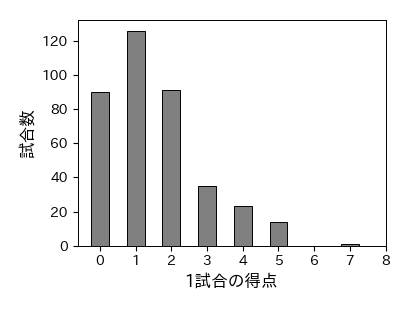

In [31]:
data = GM.loc[GM['league']=='England', 'home_score']

fig, ax = plt.subplots(figsize=(4,3))
ax.hist(data, 
        bins=np.arange(data.max()+2)-0.5, # 階級の左端の値を指定する
        histtype='bar',  # ヒストグラムのスタイル
        color='gray',    # バーの色
        edgecolor='k',   # バーの枠線の色
        rwidth=0.5
        )

ax.set_xlabel('1試合の得点', fontsize=12)
ax.set_ylabel('試合数', fontsize=12)
ax.set_xticks(np.arange(data.max()+2));

次に，上のヒストグラムがポアソン分布に従っているか調べるため，試合データから求めた平均値をパラメータとするポアソン分布を描いてみる．
イングランド・プレミアリーグのホームチームの平均得点は1.53であったので，
$$
f(x) = \frac{1.53^{x}}{x!} \mathrm{e}^{-1.53}
$$
のグラフを描けば良い．

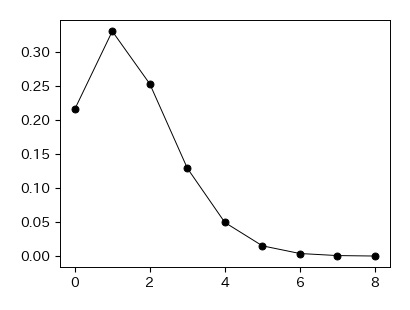

In [35]:
from scipy.stats import poisson

fig, ax = plt.subplots(figsize=(4,3))
x = np.arange(0, 9)
fx = poisson.pmf(x, data.mean())
ax.plot(x, fx, '-ok')

上のグラフを見比べると，確かに似た分布になっていることが分かる．
そこで，最後に２つのグラフを合わせよう．

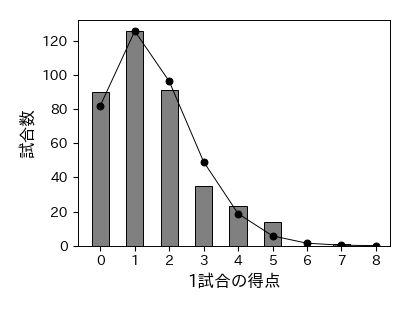

In [34]:
from scipy.stats import poisson
data = GM.loc[GM['league']=='England', 'home_score']

fig, ax = plt.subplots(figsize=(4,3))
ax.hist(data, 
        bins=np.arange(data.max()+2)-0.5, # 階級の左端の値を指定する
        histtype='bar',  # ヒストグラムのスタイル
        color='gray',    # バーの色
        edgecolor='k',   # バーの枠線の色
        rwidth=0.5
        )

x = np.arange(data.max()+2)
fx = data.size * poisson.pmf(x, data.mean())
ax.plot(x, fx, '-ok')

ax.set_xlabel('1試合の得点', fontsize=12)
ax.set_ylabel('試合数', fontsize=12)
ax.set_xticks(np.arange(data.max()+2));

実データ（棒グラフ）とポアソン分布（折れ線）の概形はおおよそ一致していることが分かる．
これは，得点の平均値と分散が近い値になったことと共に，サッカーの得点分布がポアソン分布に従うことを裏付ける材料となる．
もちろん，サッカーの得点分布が普遍的にポアソン分布に従うかどうかは，他のリーグのデータを調べなければわからない（確かめてみよ）．
また，$\chi^2$検定などを用いてより定量的な検証を行うことも必要である．

### 演習問題

- 他のリーグについて，得点分布を求めよ

### 発展問題：バスケの得点分布

以下は2015年度NBAの得点データである：[score_nba.csv](https://drive.google.com/uc?export=download&id=18qfHa2OIjSmRqxFaAsFvn3O706-676Vs)<br>
'away', 'home'列はアウェイチームとホームチームの得点，'total'列は両チームの得点の和を表す．
このデータを用いてバスケットボールの得点傾向を調べ，サッカーとの違いを考察せよ．<br>
**※ レポート問題として取り組んでも良い．**

In [28]:
# 得点データの読み込み
data = pd.read_csv('./6_event/score_nba.csv')
data.head()

,away,home,total
0,37,37,74
1,38,37,75
2,35,41,76
3,29,36,65
4,34,39,73


## イベントデータの解析

Pappalardoデータセットのメインデータはイベントデータである．
イベントデータはイベントログとイベントタグの2種類から成る：
- イベントログ
    - パスやシュートなどのボールに関わるイベントに対して，起きた時刻，場所，関わった選手などの基本情報が紐付けられたデータ
    - 1試合あたり1500~2000イベント
- イベントタグ
    - イベントログの各イベントに対して，より詳細な付加情報が紐付けられたデータ

イベントデータにはボールに関わるほぼ全てのプレー情報が含まれているため，詳細な試合展開を把握することができる．
イベントデータは選手プロフィールや得点データに比べて格段に情報量が多いため，その扱いの難易度も高い．
基本的にExcelで解析するのは困難であり，Pandasの本領が最も発揮されるデータといえる．

ここでは，イングランド・プレミアリーグのデータを解析対象とする．
準備として，以下のファイルをダウンロードして作業フォルダ（例えば`OneDrive/sport_data/6_event`）に移動する：
- イベントログ：[event_England.csv](https://drive.google.com/uc?export=download&id=1783Zl4IRGmiYmo-uLA1-FsZwGesOsFhg)
- イベントタグ：[event_tag_England.csv](https://drive.google.com/uc?export=download&id=17LhNNVGZ9nsm-d3lqfBWiKmEqGitJwVI)
- 選手プロフィール：[player.csv](https://drive.google.com/uc?export=download&id=1rtCAL0DqW9SeslMuGFCusg8VRRWz6J_M)

これらを以下のように読み込んでおく．

In [461]:
# イベントデータと選手プロフィールの読み込み
EV = pd.read_csv('./6_event/event_England.csv')
EV_tag = pd.read_csv('./6_event/event_tag_England.csv')
PL = pd.read_csv('./6_event/player.csv', header=0)

また，以下の補助データも同じフォルダにダウンロードしておく：
- イベントリスト：[event_list.csv](https://drive.google.com/uc?export=download&id=1oSDUt73paDOsORVj732rGU0vwIwGHvHJ) 
- タグリスト：[tag_list.csv](https://drive.google.com/uc?export=download&id=1o_tZ-y0eAYlgN1audJThoVBMN0Ta2x5f)

### イベントデータの詳細

**イベントログ**

In [462]:
EV.head()

,id,game_id,half,t,team_id,player_id,event,event_id,subevent,subevent_id,x1,y1,x2,y2
0,177959171,2499719,1,2.758649,1609,25413,pass,8,simple_pass,85.0,49.0,49.0,31.0,78.0
1,177959172,2499719,1,4.946850,1609,370224,pass,8,high_pass,83.0,31.0,78.0,51.0,75.0
2,177959173,2499719,1,6.542188,1609,3319,pass,8,head_pass,82.0,51.0,75.0,35.0,71.0
3,177959174,2499719,1,8.143395,1609,120339,pass,8,head_pass,82.0,35.0,71.0,41.0,95.0
4,177959175,2499719,1,10.302366,1609,167145,pass,8,simple_pass,85.0,41.0,95.0,72.0,88.0


`EV`には380試合分のイベントログが含まれており，その行数は643150にのぼる．
`EV`の各行は試合中の１イベントに対応し，各列にそのイベントに関する基本情報が収められている．
各列の内容は下表の通りである．

| 変数名 | 内容 |
| ---- | ---- |
| id | １つのイベントに付与される識別ID（１行に対して１つのIDが付与される） | 
| game_id | 試合ID |
| half | 1H（前半），2H（後半），E1（延長前半），E2（延長後半），P（ペナルティ）|
| t | イベントが起きた時間（ハーフ開始からの経過時間）．単位は秒 |
| team_id | チームID |
| player_id | 選手ID |
| event | イベントタイプの名前．全7種類 |
| event_id | イベントタイプのID |
| subevent | サブイベントタイプのID |
| subevent_id | サブイベントタイプの名前 |
| x1 | イベントの始まりの$x$座標（単位は\%） |
| y1 | イベントの始まりの$y$座標（単位は\%） |
| x2 | イベントの終わりの$x$座標（単位は\%） |
| y2 | イベントの終わりの$y$座標（単位は\%） |

**イベントログの座標系**

イベントの始まりの座標$(x_{1}, y_{1})$と終わりの座標$(x_{2}, y_{2})$が存在する．
座標系は以下の通りである：
- 原点は左下
- $x,\ y$座標の値はフィールドの横幅と縦幅の最大値に対する割合（単位は\%）
    - $0\le x \le 100$
    - $0\le y \le 100$
- HomeとAwayの攻撃方向は右方向に統一されている
    - チームや前後半に関係なく，$x>50$が相手陣，$x<50$が自陣
    - **※ 解析内容に応じて，チームごとに攻撃方向が逆になるように変換する必要がある**

サッカーコートの公式規格は$105\mathrm{m}\times 68\mathrm{m}$なので，コートを描く際にはアスペクト比を以下のように設定する：
```python
ax.set_aspect(68/105)
```

Text(0, 0.5, '$Y$')

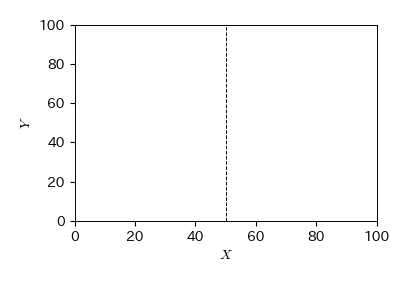

In [464]:
'''サッカーコートの描画'''
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_aspect(68/105)

# ハーフウェイライン
ax.plot([50, 50], [0, 100], 'k--') 

# 描画範囲と軸ラベル
ax.set_xlim(0, 100); ax.set_ylim(0, 100)
ax.set_xlabel('$X$'); ax.set_ylabel('$Y$')

**イベントタグ**

In [463]:
EV_tag.head()

,id,goal,own_goal,opportunity,assist,keypass,left,right,head/body,free_space_r,...,interception,sliding_tackle,red_card,yellow_card,second_yellow_card,accurate,not_accurate,counter_attack,dangerous_ball_lost,blocked
0,177959171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,177959172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,177959173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,177959174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,177959175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


`EV_tag`はイベントログ`EV`と同じ行数のDataFrameであり，各行が試合中の１イベントを表している．
一方，各列には'goal'，'assist'などのイベントに付与されたタグ（付加情報）が並んでおり，真ならば1，偽ならば0となっている．
例えば，'goal'列が1である行では，そのイベントにおいて得点が入ったことを意味する．
タグの詳細情報は[tag_list.csv](https://drive.google.com/uc?export=download&id=1o_tZ-y0eAYlgN1audJThoVBMN0Ta2x5f)にまとめられている．
主要なタグを下表にまとめる．

| タグ名 | 内容 |
| ---- | ---- |
| accurate | イベントの成功 |
| not accurate | イベントの失敗 |
| assist | アシスト | 
| goal | 得点 | 
| own_goal | オウンゴール |  


### イベントデータ解析の基本

イベントログ`EV`とイベントタグ`EV_tag`には，ボールに関わるイベントに関するほぼ全ての情報が含まれている．
イベントデータ解析の目的はこれらのデータから意味のある情報を抽出することである．
イベントデータを解析する際の手順は以下のようにまとめられる：
1. イベントログ，イベントタグから必要なデータを条件付き抽出する
2. 条件付き抽出したデータを集計する
3. 集計したデータを可視化する

以下では，条件付き抽出の例をいくつか示す．

**特定の試合・時間帯の抽出**

In [276]:
# 特定の試合を抽出
ev = EV.loc[EV['game_id']==EV['game_id'].unique()[0]]
ev_tag = EV_tag.loc[EV['game_id']==EV['game_id'].unique()[0]]

In [277]:
ev.head()

,id,game_id,half,t,team_id,player_id,event,event_id,subevent,subevent_id,x1,y1,x2,y2
0,177959171,2499719,1,2.758649,1609,25413,pass,8,simple_pass,85.0,49.0,49.0,31.0,78.0
1,177959172,2499719,1,4.946850,1609,370224,pass,8,high_pass,83.0,31.0,78.0,51.0,75.0
2,177959173,2499719,1,6.542188,1609,3319,pass,8,head_pass,82.0,51.0,75.0,35.0,71.0
3,177959174,2499719,1,8.143395,1609,120339,pass,8,head_pass,82.0,35.0,71.0,41.0,95.0
4,177959175,2499719,1,10.302366,1609,167145,pass,8,simple_pass,85.0,41.0,95.0,72.0,88.0


In [278]:
ev_tag.head()

,id,goal,own_goal,opportunity,assist,keypass,left,right,head/body,free_space_r,...,interception,sliding_tackle,red_card,yellow_card,second_yellow_card,accurate,not_accurate,counter_attack,dangerous_ball_lost,blocked
0,177959171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,177959172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,177959173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,177959174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,177959175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [279]:
# 前半のみ抽出
ev.loc[ev['half']==1].tail()

,id,game_id,half,t,team_id,player_id,event,event_id,subevent,subevent_id,x1,y1,x2,y2
896,177960132,2499719,1,2814.014522,1631,8653,others_on_the_ball,7,touch,72.0,14.0,49.0,11.0,61.0
897,177960129,2499719,1,2814.484544,1609,14869,pass,8,simple_pass,85.0,89.0,39.0,92.0,50.0
898,177960130,2499719,1,2815.900791,1609,7945,shot,10,shot,100.0,92.0,50.0,0.0,0.0
899,177960121,2499719,1,2817.604704,1631,8480,save_attempt,9,reflexes,90.0,100.0,100.0,8.0,50.0
900,177960127,2499719,1,2852.557381,1631,14853,pass,8,simple_pass,85.0,31.0,24.0,100.0,100.0


In [280]:
# 前半開始20秒までを抽出
ev.loc[(ev['half']==1) & (ev['t']<20)].tail()

,id,game_id,half,t,team_id,player_id,event,event_id,subevent,subevent_id,x1,y1,x2,y2
6,177959186,2499719,1,13.961228,1631,8653,pass,8,head_pass,82.0,23.0,25.0,39.0,15.0
7,177959189,2499719,1,14.765321,1631,8013,duel,1,air_duel,10.0,39.0,15.0,33.0,20.0
8,177961218,2499719,1,14.765321,1609,0,duel,1,air_duel,10.0,61.0,85.0,67.0,80.0
9,177959178,2499719,1,15.320341,1609,167145,pass,8,head_pass,82.0,67.0,80.0,59.0,61.0
10,177959179,2499719,1,18.051875,1609,49876,pass,8,head_pass,82.0,59.0,61.0,45.0,45.0


**特定のイベントの抽出**

イベントログ`EV`には'event'列と'subevent'列が存在する．
'event'列は'pass'，'foul'などの大分類，'subevent'列は'simple_pass'や'high_pass'などの小分類となっている．
'event'および'subevent'のリストは[event_list.csv](https://drive.google.com/uc?export=download&id=1oSDUt73paDOsORVj732rGU0vwIwGHvHJ) にまとめられている．

In [281]:
# event列が'pass'の行を抽出
ev.loc[ev['event']=='pass'].head()

,id,game_id,half,t,team_id,player_id,event,event_id,subevent,subevent_id,x1,y1,x2,y2
0,177959171,2499719,1,2.758649,1609,25413,pass,8,simple_pass,85.0,49.0,49.0,31.0,78.0
1,177959172,2499719,1,4.946850,1609,370224,pass,8,high_pass,83.0,31.0,78.0,51.0,75.0
2,177959173,2499719,1,6.542188,1609,3319,pass,8,head_pass,82.0,51.0,75.0,35.0,71.0
3,177959174,2499719,1,8.143395,1609,120339,pass,8,head_pass,82.0,35.0,71.0,41.0,95.0
4,177959175,2499719,1,10.302366,1609,167145,pass,8,simple_pass,85.0,41.0,95.0,72.0,88.0


In [282]:
# subevent列が'simple_pass'の行を抽出
ev.loc[ev['subevent']=='simple_pass'].head()

,id,game_id,half,t,team_id,player_id,event,event_id,subevent,subevent_id,x1,y1,x2,y2
0,177959171,2499719,1,2.758649,1609,25413,pass,8,simple_pass,85.0,49.0,49.0,31.0,78.0
4,177959175,2499719,1,10.302366,1609,167145,pass,8,simple_pass,85.0,41.0,95.0,72.0,88.0
5,177959177,2499719,1,12.548934,1609,3319,pass,8,simple_pass,85.0,72.0,88.0,77.0,75.0
17,177959196,2499719,1,29.980898,1631,265366,pass,8,simple_pass,85.0,29.0,26.0,37.0,8.0
18,177959197,2499719,1,31.163870,1631,8013,pass,8,simple_pass,85.0,37.0,8.0,23.0,5.0


In [283]:
# event列が'shot'の行を抽出
ev.loc[(ev_tag['goal']==1)].head()

,id,game_id,half,t,team_id,player_id,event,event_id,subevent,subevent_id,x1,y1,x2,y2
46,177959212,2499719,1,94.595788,1609,25413,shot,10,shot,100.0,88.0,41.0,0.0,0.0
47,177959226,2499719,1,96.970614,1631,8480,save_attempt,9,reflexes,90.0,100.0,100.0,12.0,59.0
91,177959280,2499719,1,254.745027,1631,14763,shot,10,shot,100.0,96.0,52.0,100.0,100.0
92,177959249,2499719,1,256.547834,1609,7882,save_attempt,9,reflexes,90.0,0.0,0.0,4.0,48.0
554,177959759,2499719,1,1710.855093,1631,12829,shot,10,shot,100.0,94.0,54.0,100.0,100.0


**イベントタグを用いた抽出**

イベントタグ`EV_tag`はイベントログ`EV`と同じ行数で共通の行ラベル（インデックス）を持つ．
よって，`EV_tag`で取得したブールインデックスを用いて`EV`から条件付き抽出することができる．

In [284]:
# イベント名が'pass'で，'accurate'タグが1である行（成功パス）を抽出
ev.loc[(ev['event']=='pass') & (ev_tag['accurate']==1)]

,id,game_id,half,t,team_id,player_id,event,event_id,subevent,subevent_id,x1,y1,x2,y2
0,177959171,2499719,1,2.758649,1609,25413,pass,8,simple_pass,85.0,49.0,49.0,31.0,78.0
1,177959172,2499719,1,4.946850,1609,370224,pass,8,high_pass,83.0,31.0,78.0,51.0,75.0
2,177959173,2499719,1,6.542188,1609,3319,pass,8,head_pass,82.0,51.0,75.0,35.0,71.0
3,177959174,2499719,1,8.143395,1609,120339,pass,8,head_pass,82.0,35.0,71.0,41.0,95.0
4,177959175,2499719,1,10.302366,1609,167145,pass,8,simple_pass,85.0,41.0,95.0,72.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,177961023,2499719,2,2865.714949,1631,26150,pass,8,head_pass,82.0,65.0,94.0,72.0,83.0
1740,177961024,2499719,2,2866.965786,1631,12829,pass,8,simple_pass,85.0,72.0,83.0,69.0,74.0
1759,177961037,2499719,2,2985.152095,1631,8488,pass,8,head_pass,82.0,20.0,77.0,25.0,72.0
1762,177961039,2499719,2,2990.768201,1631,8653,pass,8,simple_pass,85.0,11.0,68.0,7.0,53.0


In [285]:
# イベント名が'shot'で，'goal'タグが1である行（成功シュート）
ev.loc[(ev['event']=='shot') & (ev_tag['goal']==1)]

,id,game_id,half,t,team_id,player_id,event,event_id,subevent,subevent_id,x1,y1,x2,y2
46,177959212,2499719,1,94.595788,1609,25413,shot,10,shot,100.0,88.0,41.0,0.0,0.0
91,177959280,2499719,1,254.745027,1631,14763,shot,10,shot,100.0,96.0,52.0,100.0,100.0
554,177959759,2499719,1,1710.855093,1631,12829,shot,10,shot,100.0,94.0,54.0,100.0,100.0
898,177960130,2499719,1,2815.900791,1609,7945,shot,10,shot,100.0,92.0,50.0,0.0,0.0
1107,177960379,2499719,2,634.312236,1631,12829,shot,10,shot,100.0,92.0,54.0,100.0,100.0
1570,177960849,2499719,2,2231.119656,1609,7870,shot,10,shot,100.0,94.0,63.0,0.0,0.0
1613,177960902,2499719,2,2374.620655,1609,26010,shot,10,shot,100.0,91.0,44.0,0.0,0.0


### イベント別のヒートマップ

条件付き抽出の応用として，イベント別にヒートマップを描いてみよう．
まず，以下のようにヒートマップを描く`event_hmap`関数を作成する．
この関数は，$x,\ y$座標のデータを引数として受け取り，matplotlibの`hist2d`関数を用いてヒートマップを描く．

In [477]:
def event_hmap(x, y, cm='Greens'):
    
    fig, ax = plt.subplots(figsize=(4, 4))
    
    # アスペクト比の変更
    ax.set_aspect(68/105)
    
    # ヒートマップの描画
    ret = ax.hist2d(x, y,\
                    bins=[50, 25], range=[[0, 100], [0, 100]], cmap=cm, cmin=0)

    # カラーバーを追加
    fig.colorbar(ret[3], orientation='vertical', 
                 shrink=0.4, aspect=10, pad=0.05)
    
    # ハーフウェイライン
    ax.plot([50, 50], [0, 100], 'k--') 

    # 描画範囲とラベル
    ax.set_xlim(0, 100); ax.set_ylim(0, 100)
    ax.set_xlabel('$X$'); ax.set_ylabel('$Y$')

特定のイベントだけを条件付き抽出してその$x,\ y$座標を`event_hmap`関数に渡せば，そのイベントが行われたフィールド上の位置をヒートマップで可視化することができる．
以下にいくつかの例を示す．

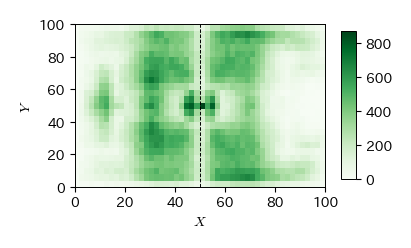

In [478]:
# パス
cond = (EV['event']=='pass')
x, y = EV.loc[cond, 'x1'], EV.loc[cond, 'y1']
event_hmap(x, y)

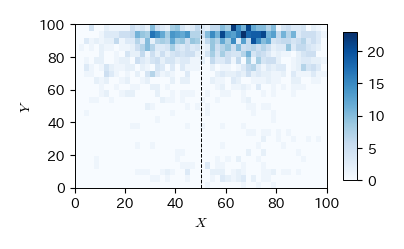

In [479]:
# 特定の選手のパス
cond = (EV['event']=='pass') & (EV['player_id']==EV['player_id'].unique()[4])
x, y = EV.loc[cond, 'x1'], EV.loc[cond, 'y1']
event_hmap(x, y, 'Blues')

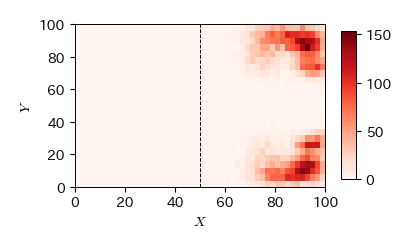

In [480]:
# クロス
cond = (EV['subevent']=='cross')
x, y = EV.loc[cond, 'x1'], EV.loc[cond, 'y1']
event_hmap(x, y, 'Reds')

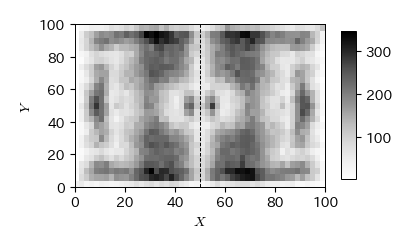

In [481]:
# デュエル
cond = (EV['event']=='duel')
x, y = EV.loc[cond, 'x1'], EV.loc[cond, 'y1']
event_hmap(x, y, 'Greys')

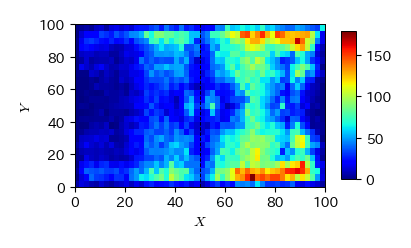

In [482]:
# デュエル（攻撃）
cond = (EV['subevent']=='ground_attacking_duel')
x, y = EV.loc[cond, 'x1'], EV.loc[cond, 'y1']
event_hmap(x, y, 'jet')

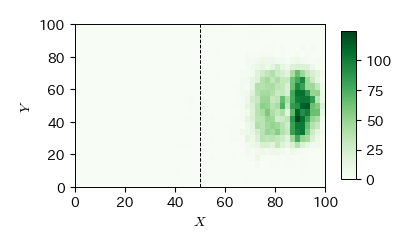

In [484]:
# シュート
cond = (EV['event']=='shot')
x, y = EV.loc[cond, 'x1'], EV.loc[cond, 'y1']
event_hmap(x, y)

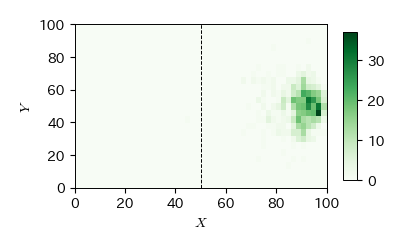

In [485]:
# シュート（成功）
cond = (EV['event']=='shot') & (EV_tag['goal']==1)
x, y = EV.loc[cond, 'x1'], EV.loc[cond, 'y1']
event_hmap(x, y)

### 選手のランキング

シーズンが終了すると，チームのリーグ成績と共に選手の個人成績が発表される．
個人成績は，シュート数やゴール数などの部門別ランキングとなっている．
ここでは，イベントデータを用いてこれらのランキングを求めてみよう．
なお，どのようなプレーをシュートやパスと見なすかは用いるデータセットによって異なっており，
以下で求めるランキングが公式発表されたものと完全に一致するわけではない．
2017年度プレミアリーグの個人成績は例えば，
- https://tavitt-football.com/2017-18_premier_playerstats/#i-4

にて確認できるが，細かい数値は本データセットから求めたものと一致しない．

ランキングの作成方法は以下の通りである．
- ランキング項目に応じて条件付き抽出する．
    - 例えば，パス数の場合は'event'列が'pass'である行を抽出する
- 条件付き抽出後のDataFrameに対し，'player_id'ごとの出現回数を求める
    - DataFrameの`value_counts`メソッドを用いる
- 選手プロフィール`PL`を用いて'player_id'を選手名に変換する

**シュート数**

In [487]:
PR_shot = EV.loc[(EV['subevent']=='shot') | (EV['subevent']=='free_kick_shot') | (EV['subevent']=='penalty'), 'player_id'].value_counts()
PR_shot = PR_shot.rename(index=dict(PL[['player_id', 'name']].values))  # 選手IDを選手名に変換する
PR_shot.iloc[:10]

H_Kane            175
Mohame_Salah      142
C_Eriksen          97
Richarlison        92
K_D_Bruyne         91
S_Agüero           91
A_Sánchez          85
Robert_Firmino     80
R_Lukaku           80
R_Sterling         80
Name: player_id, dtype: int64

**パス数**

In [488]:
PR_pass = EV.loc[(EV['event']=='pass'), 'player_id'].value_counts()
PR_pass = PR_pass.rename(index=dict(PL[['player_id', 'name']].values))  # 選手IDを選手名に変換する
PR_pass.iloc[:10]

G_Xhaka         2974
N_Otamendi      2964
Fernandinho     2842
Azpilicueta     2713
K_D_Bruyne      2672
N_Matić         2456
Davi_Silva      2382
J_Vertonghen    2370
K_Walker        2316
C_Eriksen       2196
Name: player_id, dtype: int64

**アシスト数**

In [489]:
PR_assist = EV.loc[(EV_tag['assist']==1), 'player_id'].value_counts()
PR_assist = PR_assist.rename(index=dict(PL[['player_id', 'name']].values))  # 選手IDを選手名に変換する
PR_assist.iloc[:10]

K_D_Bruyne      16
L_Sané          13
R_Sterling      10
Davi_Silva      10
R_Mahrez        10
H_Mkhitaryan     9
D_Alli           9
C_Eriksen        9
M_Özil           8
P_Pogba          8
Name: player_id, dtype: int64

**ゴール数**

In [490]:
PR_goal = EV.loc[((EV['event']=='shot') | (EV['event']=='free_kick')) & (EV_tag['goal']==1), 'player_id'].value_counts()
PR_goal = PR_goal.rename(index=dict(PL[['player_id', 'name']].values))  # 選手IDを選手名に変換する
PR_goal.iloc[:10]

Mohame_Salah      32
H_Kane            29
S_Agüero          21
J_Vardy           20
R_Sterling        18
R_Lukaku          16
Robert_Firmino    15
A_Lacazette       14
Gabrie_Jesus      13
E_Hazard          12
Name: player_id, dtype: int64

### ボールの軌跡の可視化

イベントデータを用いると，パスやシュートなどのイベント単位で試合展開を追跡することができる．
ここでは，特定の試合に対し，ボールの軌跡を可視化してみよう．

**試合の抽出**

In [491]:
# 後のエラー対処のために明示的に.copy()を付けている
ev = EV.loc[EV['game_id']==EV['game_id'].unique()[0]].copy()
ev_tag = EV_tag.loc[EV['game_id']==EV['game_id'].unique()[0]].copy()

**チーム名の確認**

In [492]:
tm_id = ev['team_id'].unique()
tm_id

array([1609, 1631])

**座標の反転（片方のチーム）**

元のデータでは，両チームの攻撃方向が右方向に統一されている．
これだと，試合展開を可視化する際にわかりにくいので，一方のチームの攻撃方向が逆になるように変換する．
以下のように，片方のチーム（'team_id'が1631）の$x, y$座標から最大値100を引き，絶対値を取ればよい．

In [493]:
ev.loc[ev['team_id']==tm_id[1], ['x1', 'x2']] = np.abs(ev.loc[ev['team_id']==tm_id[1], ['x1', 'x2']] - 100)
ev.loc[ev['team_id']==tm_id[1], ['y1', 'y2']] = np.abs(ev.loc[ev['team_id']==tm_id[1], ['y1', 'y2']] - 100)

# 座標の補正
ev.loc[(ev['x1']==0)|(ev['x2']==0), ['x2', 'y2']] = np.nan
ev.loc[(ev['x1']==100)|(ev['x2']==100), ['x2', 'y2']] = np.nan

**ボールの軌跡の描画**

イベントログにはイベントの始点と終点の座標が収められており，これがおおよそボールの軌跡に対応する．
そこで，`matplotlib`の`plot`関数を用いてイベントの始点と終点の座標を結ぶことで，ボールの軌跡を描いてみる．
なお，イベント名が'duel'の場合，始点と終点の座標が同じで'team_id'が異なる2つの行が挿入されている．

In [496]:
ev.loc[ev['event']=='duel'].head()

,id,game_id,half,t,team_id,player_id,event,event_id,subevent,subevent_id,x1,y1,x2,y2,tmp
7,177959189,2499719,1,14.765321,1631,8013,duel,1,air_duel,10.0,61.0,85.0,67.0,80.0,NaN
8,177961218,2499719,1,14.765321,1609,0,duel,1,air_duel,10.0,61.0,85.0,67.0,80.0,NaN
12,177959191,2499719,1,21.878309,1631,8653,duel,1,air_duel,10.0,71.0,54.0,50.0,59.0,NaN
13,177959181,2499719,1,22.551816,1609,25413,duel,1,air_duel,10.0,71.0,54.0,50.0,59.0,NaN
22,177959205,2499719,1,38.191874,1631,12829,duel,1,ground_loose_ball_duel,13.0,33.0,78.0,29.0,85.0,NaN


これは，ボール保持チームが特定できないためと考えられる．
そこで，イベント名が'duel'の場合には一方のチームの座標だけを黒線で描画し，それ以外はチームごとに色分けして描画することにする．
以下の`ball_trj`関数は，時間帯を３つの引数`half`, `ts`, `te`で指定し，その時間帯でボールの軌跡を描く．

In [504]:
def ball_trj(half=1, ts=0, te=50):
    '''
    half: 前半1， 後半2
    ts: 始点に対応する時刻
    te: 終点に対応する時刻
    '''
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_aspect(68/105)

    ev['tmp'] = np.nan
    cond = (ev['half']==1) & (ev['t'] > ts) & (ev['t'] < te)

    # チーム0のpass
    X0 = ev.loc[cond & (ev['team_id']==tm_id[0]) & (ev['event']!='duel'), ['x1', 'x2', 'tmp']].values.reshape(-1)
    Y0 = ev.loc[cond & (ev['team_id']==tm_id[0]) & (ev['event']!='duel'), ['y1', 'y2', 'tmp']].values.reshape(-1)
    ax.plot(X0, Y0, 'o-r', mfc='None')

    # チーム1のpass
    X1 = ev.loc[cond & (ev['team_id']==tm_id[1]) & (ev['event']!='duel'), ['x1', 'x2', 'tmp']].values.reshape(-1)
    Y1 = ev.loc[cond & (ev['team_id']==tm_id[1]) & (ev['event']!='duel'), ['y1', 'y2', 'tmp']].values.reshape(-1)
    ax.plot(X1, Y1, '^-b', mfc='None')

    # duel
    X2 = ev.loc[cond & (ev['team_id']==tm_id[1]) & (ev['event']=='duel'), ['x1', 'x2', 'tmp']].values.reshape(-1)
    Y2 = ev.loc[cond & (ev['team_id']==tm_id[1]) & (ev['event']=='duel'), ['y1', 'y2', 'tmp']].values.reshape(-1)
    ax.plot(X2, Y2, '-k')

    # ハーフウェイライン
    ax.plot([50, 50], [0, 100], 'k--') 

    # 描画範囲とラベル
    ax.set_xlim(0, 100); ax.set_ylim(0, 100)
    ax.set_xlabel('$X$'); ax.set_ylabel('$Y$')

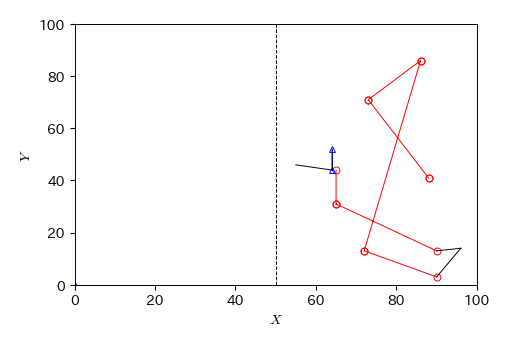

In [502]:
ball_trj(half=1, ts=50, te=100)

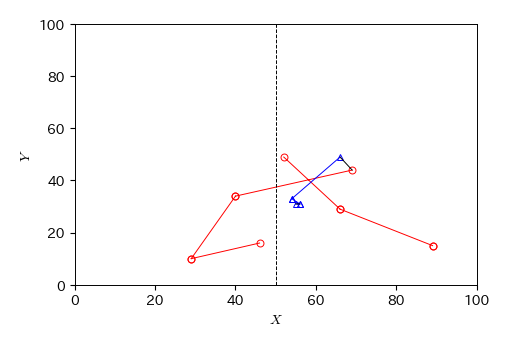

In [506]:
ball_trj(half=2, ts=2000, te=2050)

### 選手間のパス数の可視化

最後に，特定の試合における選手間のパス数を可視化してみよう．
本来，このような解析にはnetworkxという専用のライブラリを使うべきだが，以下ではpandasとseabornという可視化ライブラリを用いて実装する．

**試合の抽出**

In [507]:
# 後のエラー対処のために明示的に.copy()を付けている
ev = EV.loc[EV['game_id']==EV['game_id'].unique()[0]].copy()
ev_tag = EV_tag.loc[EV['game_id']==EV['game_id'].iloc[0]].copy()

**パスリストの作成** 

選手間のパス数を求めるには，パスの出し手と受け手の情報が必要である．
しかし，イベントログ`EV`にはパスの出し手の情報しかないので，受け手の情報を加える必要がある．
イベント名が'pass'の行については，次の行の選手IDがパスの受け手に対応するので，以下のようにパスリスト`ps`を作成できる．

In [508]:
ps = ev.loc[ev['event']=='pass', ['player_id', 'team_id']]
ps['player_id2'], ps['team_id2'] = 0, 0
ps['player_id2'].iloc[:-1] = ps['player_id'].iloc[1:].values
ps['team_id2'].iloc[:-1] = ps['team_id'].iloc[1:].values
ps.head()

,player_id,team_id,player_id2,team_id2
0,25413,1609,370224,1609
1,370224,1609,3319,1609
2,3319,1609,120339,1609
3,120339,1609,167145,1609
4,167145,1609,3319,1609


**選手名の追加**

イベントログには選手ID（'player_id'）の情報しかないので，選手プロフィール`PL`のデータを用いて選手名を追加する．
以下のように，`replace`メソッドを用いて，選手ID（'player_id'）を選手名（'name'）に置換すれば良い．

In [509]:
ps['name'] = ps['player_id'].replace(PL['player_id'].values, PL['name'].values)
ps['name2'] = ps['player_id2'].replace(PL['player_id'].values, PL['name'].values)
ps.head()

,player_id,team_id,player_id2,team_id2,name,name2
0,25413,1609,370224,1609,A_Lacazette,R_Holding
1,370224,1609,3319,1609,R_Holding,M_Özil
2,3319,1609,120339,1609,M_Özil,Mohame_Elneny
3,120339,1609,167145,1609,Mohame_Elneny,Bellerín
4,167145,1609,3319,1609,Bellerín,M_Özil


**パス数行列の作成**

チーム内の選手$i$と$j$間のパス数を要素とする行列をパス数行列と呼ぶことにする．
パス数行列は非対称な行列であり，行列の$(i, j)$成分は選手$i$から$j$へのパス，$(j, i)$成分はその逆を表す．
パス数行列の作成方法はいくつか考えられるが，以下では`for`文を用いて実装している．

In [514]:
pl_id0 = ps.loc[ps['team_id']==tm_id[0], 'name'].unique()
pl_id1 = ps.loc[ps['team_id']==tm_id[1], 'name'].unique()
A0 = pd.DataFrame(index=pl_id0, columns=pl_id0)
A1 = pd.DataFrame(index=pl_id1, columns=pl_id1)

In [515]:
for i in pl_id0:
    for j in pl_id0:
        A0.loc[i, j] = len(ps.loc[(ps['name']==i) & (ps['name2']==j)])

for i in pl_id1:
    for j in pl_id1:
        A1.loc[i, j] = len(ps.loc[(ps['name']==i) & (ps['name2']==j)])
        
A0 = A0.astype(int)
A1 = A1.astype(int)

**パス数行列の可視化**

パス数行列を可視化する方法はいくつか考えられる．
例えば，選手を点，選手間のパス数を線の太さに対応させた図で表す方法がある．
このような図はネットワーク呼ばれ，サッカーのデータ分析における標準的な手法となっている．
しかし，ネットワークの分析と可視化にはnetworkxなどの専用ライブラリの知識が必要となるので，ここではより直接的にヒートマップを用いた可視化方法を採用する．
以下の`plot_corr_mat`関数は，seabornという可視化ライブラリを用いてパス数行列をヒートマップで可視化する．

In [528]:
import seaborn
def plot_corr_mat(mat, cm='jet'):
    fig, ax = plt.subplots(figsize=(5, 5))
    seaborn.heatmap(mat, ax=ax, linewidths=0.1, cbar=True, annot=True,\
                    square=True, cmap=cm, linecolor='w', cbar_kws={"shrink": .7})
    ax.set_xticklabels(mat.columns, fontsize=8)
    ax.set_yticklabels(mat.index, fontsize=8)
    ax_clb = ax.collections[0].colorbar
    ax_clb.ax.tick_params(labelsize=8)

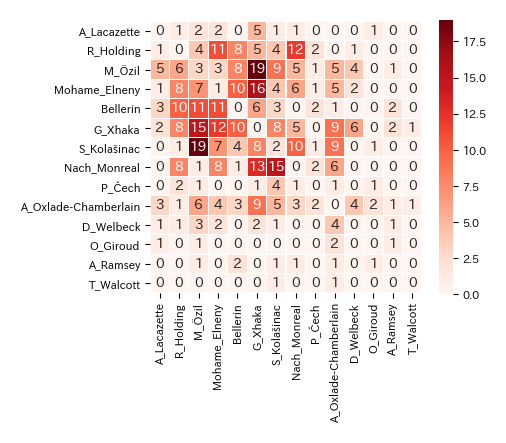

In [529]:
plot_corr_mat(A0, 'Reds')

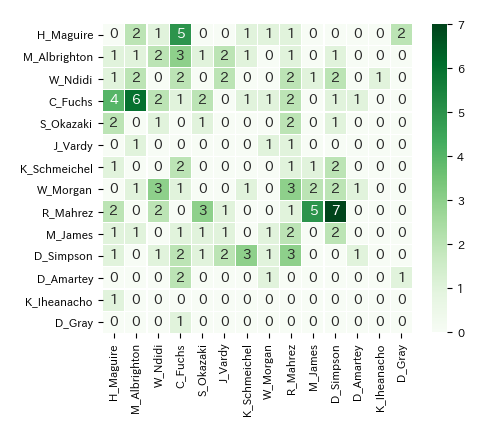

In [527]:
plot_corr_mat(A1, 'Greens')